<a href="https://colab.research.google.com/github/Malev0070/Malev0070/blob/main/Caf%C3%A9_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from dateutil import parser
from google.colab import files
import plotly.io as pio



from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE

In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/café_dados/df_arabica_clean.csv')

NameError: name 'pd' is not defined

In [ ]:
df .head()

In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("Número de linhas duplicadas df: ", duplicate_rows_data.shape)


Número de linhas duplicadas:  (0, 41)


In [ ]:
# Fazer um loop em cada coluna para contar o número de valores distindos

for column in df.columns:
  num_distinct_values = len(df[column].unique())
  print(f"{column}: {num_distinct_values} valores distintos")

Unnamed: 0: 207 valores distintos
ID: 207 valores distintos
Country of Origin: 22 valores distintos
Farm Name: 173 valores distintos
Lot Number: 188 valores distintos
Mill: 163 valores distintos
ICO Number: 68 valores distintos
Company: 72 valores distintos
Altitude: 98 valores distintos
Region: 121 valores distintos
Producer: 173 valores distintos
Number of Bags: 55 valores distintos
Bag Weight: 39 valores distintos
In-Country Partner: 21 valores distintos
Harvest Year: 7 valores distintos
Grading Date: 75 valores distintos
Owner: 80 valores distintos
Variety: 49 valores distintos
Status: 1 valores distintos
Processing Method: 11 valores distintos
Aroma: 19 valores distintos
Flavor: 19 valores distintos
Aftertaste: 20 valores distintos
Acidity: 19 valores distintos
Body: 17 valores distintos
Balance: 18 valores distintos
Uniformity: 3 valores distintos
Clean Cup: 1 valores distintos
Sweetness: 1 valores distintos
Overall: 21 valores distintos
Defects: 1 valores distintos
Total Cup Poi

In [ ]:

#checando números duplicados
df_total = df[df.duplicated()]
duplicatas = df_total.shape[0]
print(f"Números duplicados: {duplicatas}")

#soma de dados vazios
df.isna().sum()




Números duplicados: 0


Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

In [ ]:
coluM = ['Country of Origin', '']

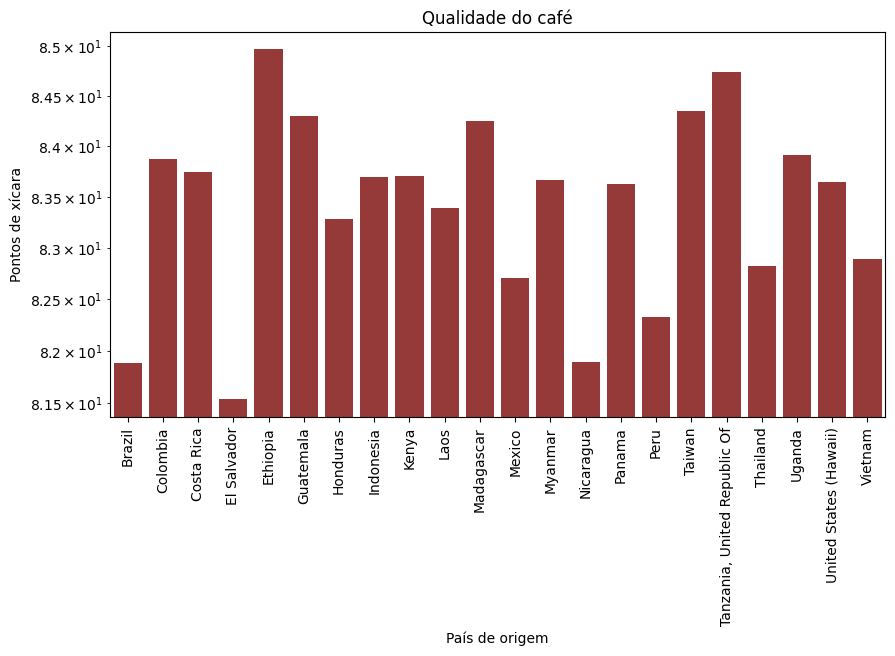

In [ ]:
import subprocess
# acumula os dados por 'country of origin' e calcula a média de 'total cup points'
df_grouped = df.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

# mapa de cor
map = px.choropleth(df_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Total Cup Points',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Brwnyl_r  ,

                    title='Qualidade do café')
map.update_layout(coloraxis_colorbar=dict(title='Pontos de xícara'))
html_path = '/content/mapa_interativo.html'
map.write_html(html_path)


map.show()

# Importando bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o tamanho da figura
plt.figure(figsize=(10, 5))

# Criando o gráfico de barras
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Total Cup Points'], color='brown')

# Configurando o título e rótulos dos eixos
plt.title('Qualidade do café')
plt.xlabel('País de origem')
plt.ylabel('Pontos de xícara')

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Aumentando a escala no eixo y
plt.yscale('log')  # Pode usar 'linear' se preferir uma escala linear

# Salvando o gráfico em PDF
plt.savefig('GráficoBarra.pdf', format='pdf')

# Exibindo o gráfico
plt.show()


In [ ]:
import pandas as pd

# Supondo que você já tenha um DataFrame chamado df com 'Variety' e 'Country of Origin'

# Realizando o split na coluna 'Variety' e criando uma nova coluna 'Single Variety'
df['Single Variety'] = df['Variety'].str.split(',').str[0].str.strip()

# Criando um DataFrame apenas com as colunas 'Country of Origin' e 'Single Variety'
variety_country_mapping = pd.DataFrame({
    'Country of Origin': df['Country of Origin'],
    'Single Variety': df['Single Variety']
})

# Removendo duplicatas para garantir uma correspondência única entre variedade e país
variety_country_mapping = variety_country_mapping.drop_duplicates()

# Exibindo o DataFrame resultante
print(variety_country_mapping)


    Country of Origin         Single Variety
0            Colombia               Castillo
1              Taiwan                  Gesha
2                Laos                   Java
3          Costa Rica                  Gesha
4            Colombia            Red Bourbon
..                ...                    ...
196         Nicaragua                Caturra
197         Nicaragua              Sarchimor
200       El Salvador                  Pacas
201            Brazil  Catuai and Mundo Novo
205       El Salvador             Maragogype

[82 rows x 2 columns]


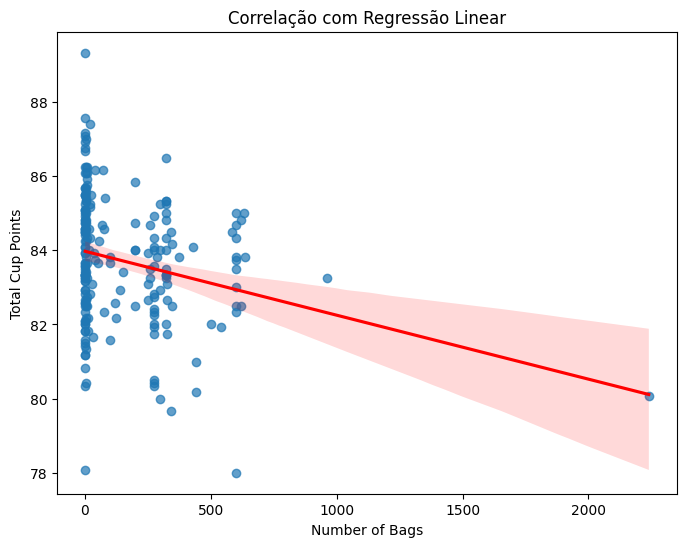

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Criando um gráfico de dispersão com linha de regressão linear
plt.figure(figsize=(8, 6))
sns.regplot(x='Number of Bags', y='Total Cup Points', data=df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

plt.title('Correlação com Regressão Linear')
plt.xlabel('Number of Bags')
plt.ylabel('Total Cup Points')

plt.show()


In [ ]:
from scipy.stats import pearsonr

# Suponha que df seja seu DataFrame do pandas com as duas colunas
# Substitua 'Number of Bags' e 'Total Cup Points' pelos nomes reais das suas colunas

# Extraindo as duas colunas do DataFrame
coluna1 = df['Number of Bags']
coluna2 = df['Total Cup Points']

# Calcula o coeficiente de correlação de Pearson e o valor-p
correlation_coefficient, p_value = pearsonr(coluna1, coluna2)

# Exibe os resultados
print(f"Coeficiente de correlação de Pearson: {correlation_coefficient}")
print(f"Valor-p: {p_value}")

# Testa a significância estatística com um nível de confiança de 95%
alpha = 0.05
if p_value < alpha:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")


Coeficiente de correlação de Pearson: -0.24375346401939085
Valor-p: 0.0004011888614119384
A correlação é estatisticamente significativa.


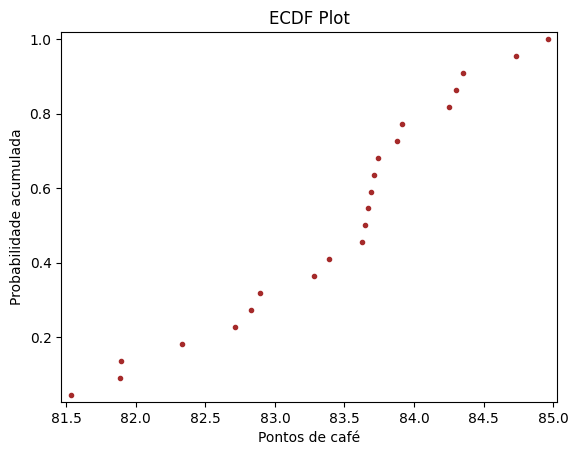

In [ ]:

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x, y = ecdf(df_grouped['Total Cup Points'])

# Plote a ECDF
plt.plot(x, y, marker='.', linestyle='none', color='brown')
plt.title('ECDF Plot')
plt.xlabel('Pontos de café')
plt.ylabel('Probabilidade acumulada')
plt.margins(0.02)  # Adiciona uma pequena margem nos eixos
plt.show()




In [ ]:
from scipy.stats import pearsonr

# Suponha que df seja seu DataFrame do pandas com as duas colunas
# Substitua 'coluna1' e 'coluna2' pelos nomes reais das suas colunas

# Extraindo as duas colunas do DataFrame
coluna1 = df['Category Two Defects']
coluna2 = df['Total Cup Points']

# Calcula o coeficiente de correlação de Pearson e o valor-p
correlation_coefficient, p_value = pearsonr(coluna1, coluna2)

# Exibe os resultados
print(f"Coeficiente de correlação de Pearson: {correlation_coefficient}")
print(f"Valor-p: {p_value}")

# Testa a significância estatística com um nível de confiança de 95%
alpha = 0.05
if p_value < alpha:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")


Coeficiente de correlação de Pearson: -0.3140920591184445
Valor-p: 4.049895738252216e-06
A correlação é estatisticamente significativa.


<ipython-input-46-6e5ae7f06999>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.1

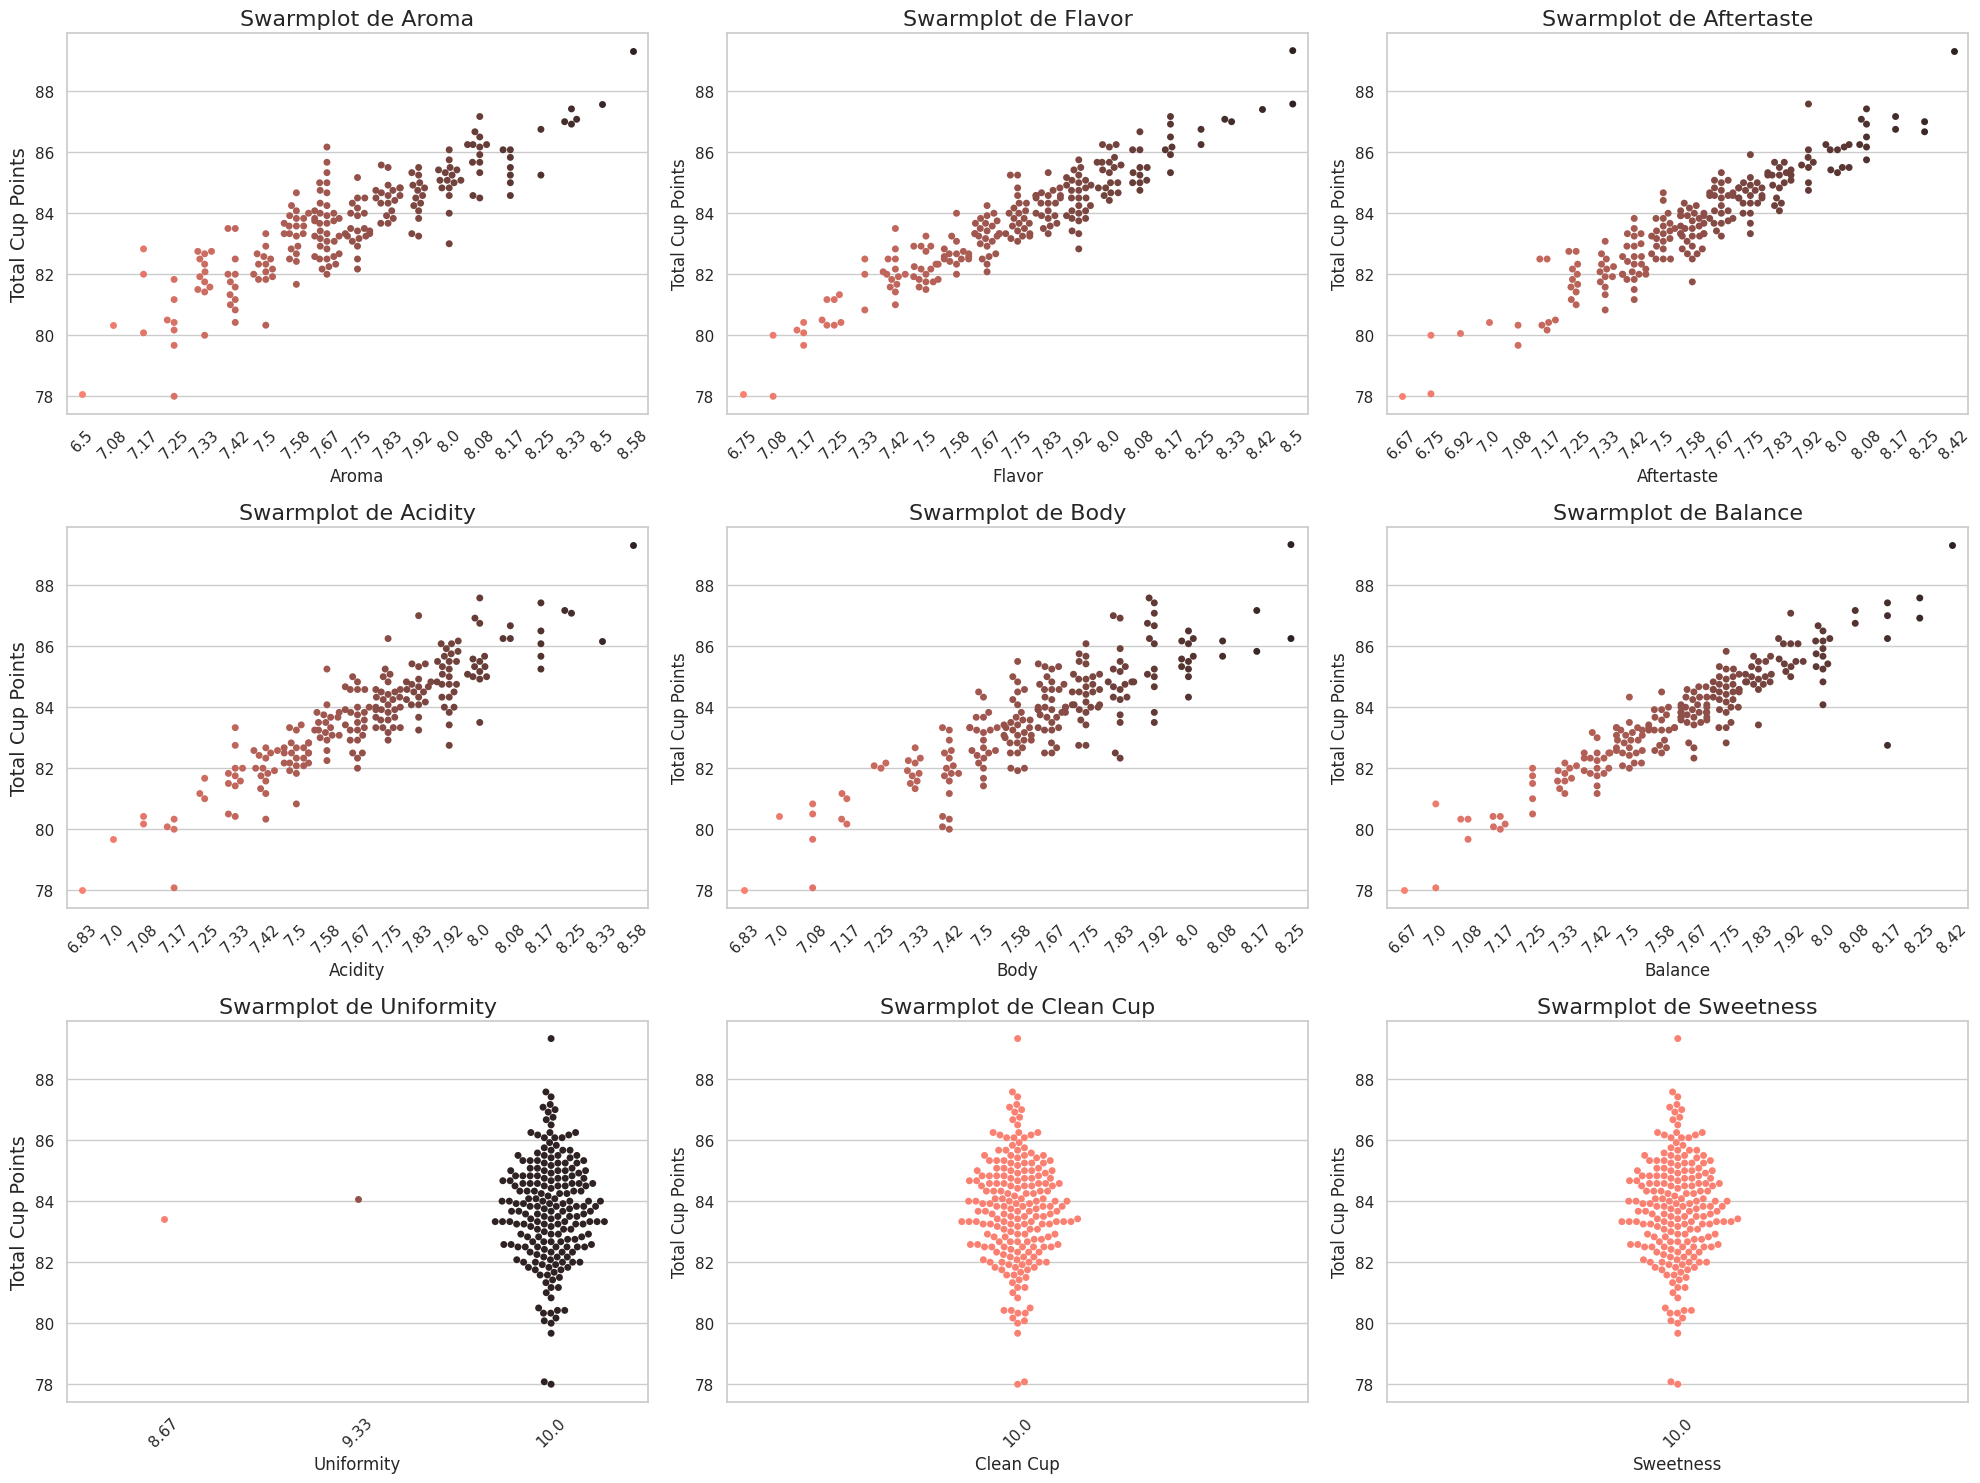

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que df seja seu DataFrame do pandas
# Substitua ['Aroma', 'Flavor', 'Aftertaste'] pelas suas colunas numéricas

# Define o estilo do seaborn
sns.set(style="whitegrid")

# Cria uma figura com subgráficos
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))  # Aumentei o número de linhas para 3

# Loop sobre as colunas numéricas
for i, coluna_numerica in enumerate(['Aroma', 'Flavor', 'Aftertaste','Acidity','Body','Balance','Uniformity','Clean Cup','Sweetness']):
    # Calcula a posição do subplot na matriz de subplots
    row, col = divmod(i, 3)

    # Cria um swarmplot para cada coluna numérica em relação à coluna categórica
    sns.swarmplot(x=coluna_numerica, y='Total Cup Points', data=df, ax=axes[row, col], palette="dark:salmon_r")  # Adicionando uma paleta de cores

    # Adiciona rótulo ao eixo y apenas no primeiro subgráfico da coluna
    if col == 0:
        axes[row, col].set_ylabel('Total Cup Points', fontsize=14)  # Ajustando o tamanho da fonte do rótulo y

    # Adiciona título ao subgráfico
    axes[row, col].set_title(f'Swarmplot de {coluna_numerica}', fontsize=16)  # Ajustando o tamanho da fonte do título

    # Ajusta a rotação dos rótulos do eixo x para melhor legibilidade
    axes[row, col].tick_params(axis='x', rotation=45)

# Ajusta o layout
plt.tight_layout()

# Exibe os swarmplots
plt.show()
plt.savefig('gráfico_enxame.png')


<ipython-input-42-0b88ebcc821c>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




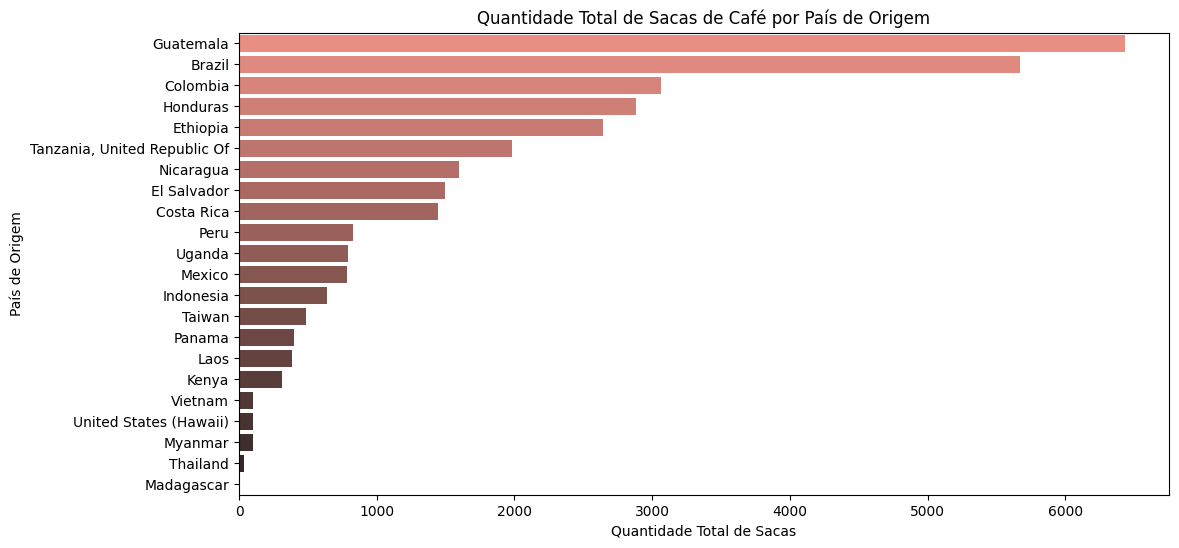

In [ ]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Contando a quantidade total de sacas de café por país de origem
bags_per_country = df.groupby('Country of Origin')['Number of Bags'].sum().reset_index()

bags_per_country = bags_per_country.sort_values(by='Number of Bags', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Bags', y='Country of Origin', data=bags_per_country, palette='dark:salmon_r')
plt.title('Quantidade Total de Sacas de Café por País de Origem')
plt.xlabel('Quantidade Total de Sacas')
plt.ylabel('País de Origem')
plt.show()




Desvio Padrão por País:
Country of Origin
Brazil                         NaN
Colombia                       NaN
Costa Rica                     NaN
El Salvador                    NaN
Ethiopia                       NaN
Guatemala                      NaN
Honduras                       NaN
Indonesia                      NaN
Kenya                          NaN
Laos                           NaN
Madagascar                     NaN
Mexico                         NaN
Myanmar                        NaN
Nicaragua                      NaN
Panama                         NaN
Peru                           NaN
Taiwan                         NaN
Tanzania, United Republic Of   NaN
Thailand                       NaN
Uganda                         NaN
United States (Hawaii)         NaN
Vietnam                        NaN
Name: Total Cup Points, dtype: float64
Valores ausentes nos Total Cup Points:
0
Desvio Padrão por País:
Country of Origin
Brazil                         NaN
Colombia                       